# Does Metacritic underrate indie games?

**Author**: Alexey Kovrev

**Corrections**:

**Date**: September 2025


## 1. Problem

Metacritic, a major critical reviews aggregator, has significant influence on the gaming industry, for its original metascore is often taken into account when deciding to purchase a new video game. However, it is considered by certain gamers as biased and favoring the titles from major publishers.

**Is it true that indie games (games created by individuals or smaller development teams) are rated lower on Metacritic?**

To answer this question, I will study the case of games published on Steam.


## 2. Library import


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 3. Data import

Original data source: https://www.kaggle.com/datasets/fronkongames/steam-games-dataset

In [2]:
df = pd.read_csv("games.csv")
pd.set_option("display.max_columns", None)
display(df)

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,0,Galactic Bowling is an exaggerated and stylize...,['English'],[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.galacticbowling.net,NaN,NaN,True,False,False,0,NaN,0,6,11,NaN,30,0,NaN,0,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://trainbandit.com,NaN,support@rustymoyher.com,True,True,False,0,NaN,0,53,5,NaN,12,0,NaN,0,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,NaN,ramoncampiaof31@gmail.com,True,False,False,0,NaN,0,0,0,NaN,0,0,NaN,0,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://henosisgame.com/,https://henosisgame.com/,info@henosisgame.com,True,True,True,0,NaN,0,3,0,NaN,0,0,NaN,0,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,https://www.unusual-games.com/home/,https://www.unusual-games.com/contact/,welistentoyou@unusual-games.com,True,True,False,0,NaN,0,50,8,NaN,17,0,This Game may contain content not appropriate ...,0,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3600970,Paragon Of Time,"Apr 10, 2025",0 - 20000,0,0,2.99,0,0,"You stand at the edge of time, trying to save ...",['English'],[],NaN,https://shared.akamai.steamstatic.com/store_it...,NaN,NaN,paragonoftime.support@pm.me,True,False,False,0,NaN,0,5,0,NaN,0,0,NaN,0,0,0,0,Webcess,Webcess,"Single-player,Full controller support,Steam Cl...","Action,Casual,Indie","Action Roguelike,Bullet Hell,Hack and Slash,Ro...",https://shared.akamai.steamstatic.com/store_it...,http://video.akamai.steamstatic.com/store_trai...
3543710,A Few Days With : Hazel,"Apr 11, 2025",0 - 20000,0,0,2.6

## 4. Data manipulation

In [3]:
#Keep only games with a Metacritic score other than 0 (which means that they have been reviewed)
df = df[df["Metacritic score"] != 0]

#Remove games that don't have genre or tag mentioned
df = df.dropna(subset=["Genres", "Tags"], how="any")

#Replace list of genres with True if it contains "Indie" and with False if it doesn't in the dataframe for the column 'Genres'
df["Genres"] = df["Genres"].map(lambda x: True if "Indie" in x else False)

#Replace list of tags with True if it contains "Indie" and with False if it doesn't in the dataframe for the column 'Tags'
df["Tags"] = df["Tags"].map(lambda x: True if "Indie" in x else False)

#Create indie category
df["is_indie"] = df["Genres"] | df["Tags"]
df["is_indie"] = df["is_indie"].replace({True : "Yes", False: "No"})

In [4]:
df

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DiscountDLC count,About the game,Supported languages,Full audio languages,Reviews,Header image,Website,Support url,Support email,Windows,Mac,Linux,Metacritic score,Metacritic url,User score,Positive,Negative,Score rank,Achievements,Recommendations,Notes,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies,is_indie
1026420,WARSAW,"Oct 2, 2019",20000 - 50000,5,0,23.99,0,0,Use everything at your disposal to help a team...,"['English', 'French', 'German', 'Polish', 'Rus...",[],“New WW2 Strategy Game Offers A Harrowing Look...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://warsawthegame.com,NaN,contact@pixmilk.com,True,False,False,62,https://www.metacritic.com/game/pc/warsaw?ftag...,0,589,212,NaN,34,427,NaN,67,0,93,0,Pixelated Milk,"Pixelated Milk,gaming company","Single-player,Steam Achievements,Steam Trading...",True,False,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Yes
22670,Alien Breed 3: Descent,"Nov 17, 2010",200000 - 500000,3,0,9.99,0,0,Alien Breed™ 3: Descent is the final explosive...,"['English', 'French', 'German', 'Italian', 'Ja...",[],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.team17.com/,NaN,NaN,True,False,False,64,https://www.metacritic.com/game/pc/alien-breed...,0,349,134,NaN,13,285,NaN,44,0,24,0,Team17 Digital Ltd,Team17 Digital Ltd,"Single-player,Multi-player,Co-op,Steam Achieve...",False,False,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,No
231330,Deadfall Adventures,"Nov 15, 2013",100000 - 200000,4,0,19.99,0,0,Deadfall Adventures is an action-driven first-...,"['English', 'German', 'Polish', 'French', 'Rus...","['English', 'German', 'Russian']",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.deadfall-game.com/,NaN,support@quanticlab.com,True,False,True,53,https://www.metacritic.com/game/pc/deadfall-ad...,0,1716,628,NaN,50,1140,NaN,324,0,431,0,The Farm 51,THQ Nordic,"Single-player,Multi-player,Co-op,Steam Achieve...",False,True,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Yes
897820,Reigns: Game of Thrones,"Oct 18, 2018",50000 - 100000,2,0,3.99,0,0,Reigns: Game of Thrones is the heir to the awa...,"['English', 'French', 'German', 'Spanish - Spa...",[],“Reigns: Game of Thrones is so much better tha...,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.reignsgame.com,http://www.reignsgame.com,NaN,True,True,True,84,https://www.metacritic.com/game/pc/reigns-game...,0,698,203,NaN,10,815,NaN,83,0,76,0,Nerial,Devolver Digital,"Single-player,Steam Achievements,Full controll...",True,True,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...,Yes
12140,Max Payne,"Jan 6, 2011",500000 - 1000000,49,17,3.49,0,0,Max Payne is a man with nothing to lose in the...,['English'],['English'],NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://www.rockstargames.com/maxpayne/,http://www.rockstargames.com/maxpayne/,NaN,True,False,False,89,https://www.metacritic.com/game/pc/max-payne?f...,0,9516,1114,NaN,0,8684,NaN,168,79,80,79,Remedy Entertainment,Rockstar Games,Single-player,False,False,https://cdn.akamai.steamstatic.com/steam/apps/...,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2458430,Leila,"Apr 7, 2025",0 - 20000,16,0,10.79,10,1,'Normally I'd dig a hole in me and then fall i...,"['English', 'Turkish', 'Simplified Chinese', '...","['English', 'Turkish', 'Ukrainian']",“Leila is a dreamy puzzle adventure with shade...,https://shared.akamai.steamstatic.com/store_it...,https://www.ubikstudios.com/leila,https://www.ubikstudios.com/contact,hello@ubikstudios.com,True,True,False,81,https://www.metacritic.com/g


## 5. Data description

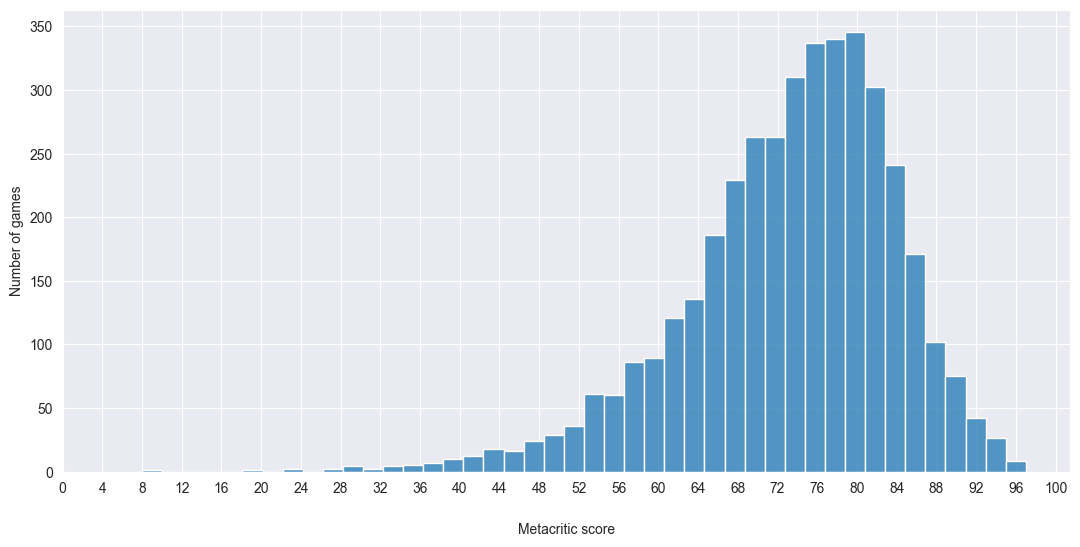

In [13]:
fig, ax = plt.subplots(figsize = (13, 6))
sns.histplot(df, x="Metacritic score", binwidth=2)
plt.gca().set_xticks(range(0, 101, 4))
plt.gca().set_xlabel("Metacritic score", labelpad=20)
plt.gca().set_ylabel("Number of games")
plt.show()

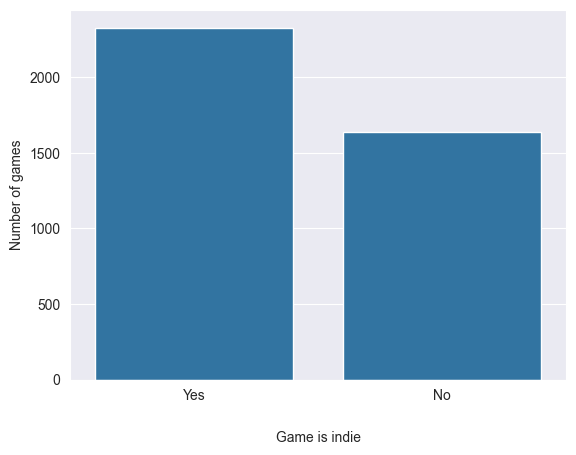

In [9]:
sns.countplot(x=df["is_indie"], stat="count")
plt.gca().set_xlabel("Game is indie", labelpad=20)
plt.gca().set_ylabel("Number of games")
plt.show()

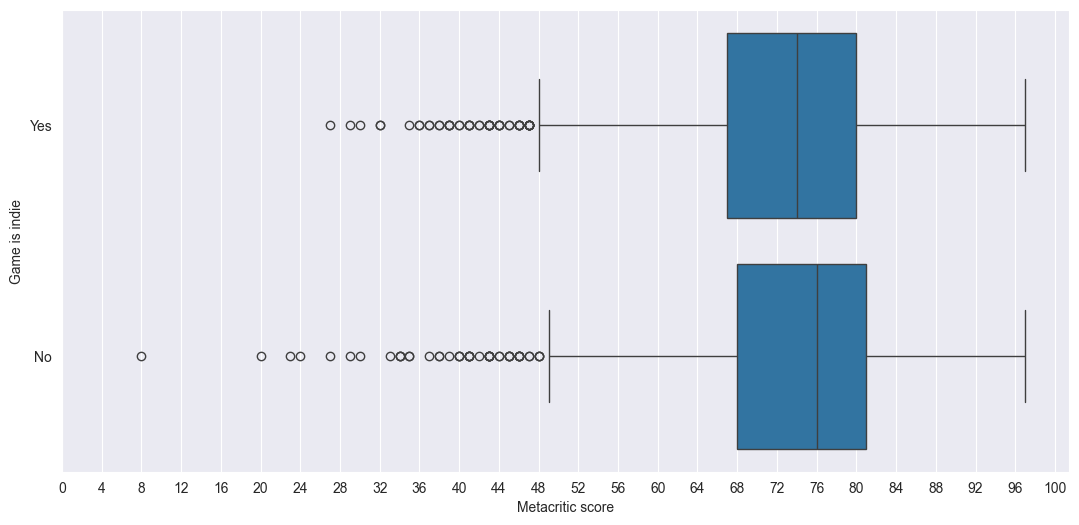

In [14]:
fig, ax = plt.subplots(figsize = (13, 6))
plot = sns.boxplot(data=df, x="Metacritic score", y="is_indie")
plt.gca().set_xticks(range(0, 101, 4))
plt.gca().set_ylabel("Game is indie")
plt.show()


## 6. Conclusion

The difference in Metacritic ratings between indie and non indie games seems to be rather minor. It stays unclear if
it is a persistent underestimation of indie games or an inaccuracy due to an insufficient amount of data.

Among other future studies, it might be interesting to compare the ratings attributed by Metacritic with those attributed by gamers themselves, for example, by analyzing data from Steam.